# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

## Summary of Findings
***
The mean normal body temperature was held to be 98.6°F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book.  After examining a data set of 130 samples (65 males and 65 females), we'll see that the mean normal body temperature is actually 98.25°F.  We'll also see that the mean body temperature of females is significantly higher than males'.

In [1]:
# IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats as smd
import pylab

# matplotlib setup
%matplotlib inline

# turn edges on in plt
plt.rcParams["patch.force_edgecolor"] = True

np.random.seed(42)

df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [2]:
# FUNCTIONS USED

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x: sort the data
    x = np.sort(data)

    # y: range for y-axis
    y = np.arange(1, n+1) / n

    return x, y

### Question #1  
***
Is the distribution of body temperatures normal?    
<ul>
    <li>Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.</br>
    <li>Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test  
</ul>

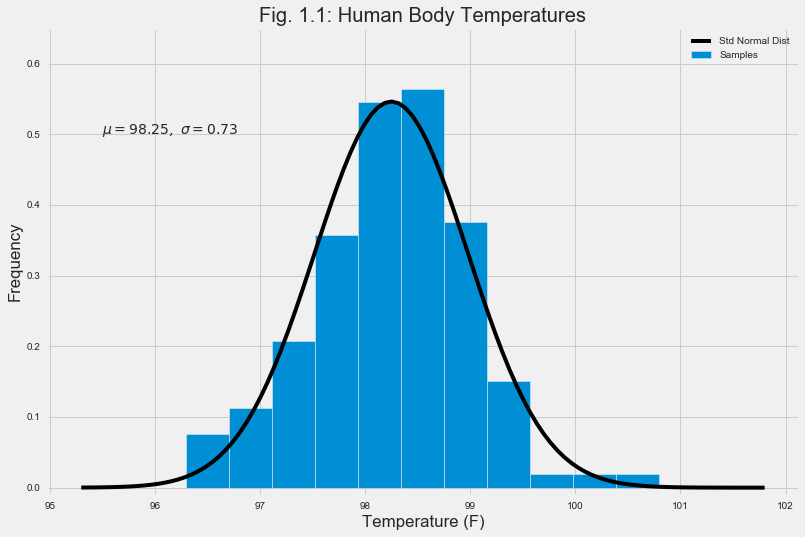

In [3]:
# Plot a histogram to see whether the distribution is normal
temp = df.temperature

sns.set(rc={"figure.figsize": (12, 8)})
plt.style.use('fivethirtyeight')

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(len(temp))

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# plot hist
_ = plt.hist(temp, density=True, bins=n_bins)

# overlay PDF of the Standard Normal Distribution
x = np.linspace(np.min(temp) - 1, np.max(temp) + 1, 100, endpoint=True)
pdf = [stats.norm.pdf(_, loc=np.mean(temp), scale=np.std(temp)) for _ in x]
plt.plot(x, pdf, 'k-')


# labels
_ = plt.text(95.5, 0.5, r'$\mu= {},\ \sigma={}$'.format(round(np.mean(temp), 2), round(np.std(temp), 2)))
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('Frequency')
_ = plt.title('Fig. 1.1: Human Body Temperatures')

margins = 0.02
_ = plt.legend(('Std Normal Dist', 'Samples'))
plt.ylim(-0.01, 0.65)
plt.show();

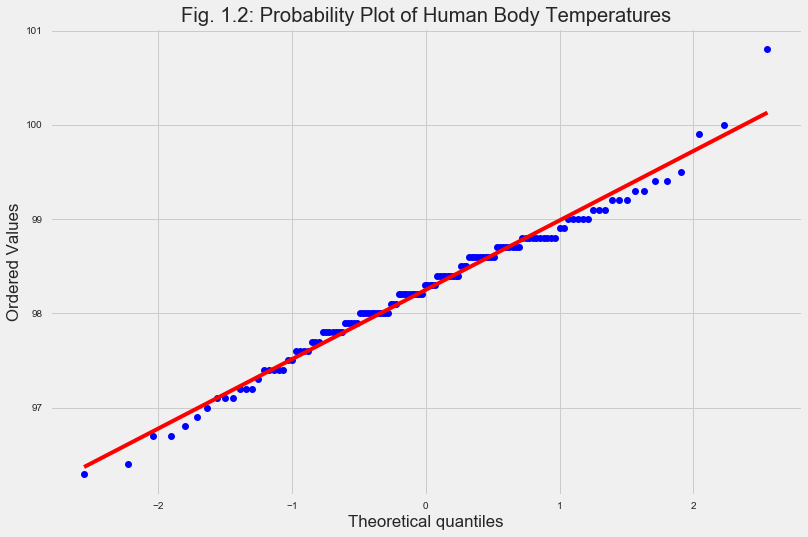

In [4]:
sns.set(rc={"figure.figsize": (12, 8)})
plt.style.use('fivethirtyeight')

stats.probplot(temp, dist='norm', plot=pylab)
plt.title('Fig. 1.2: Probability Plot of Human Body Temperatures');

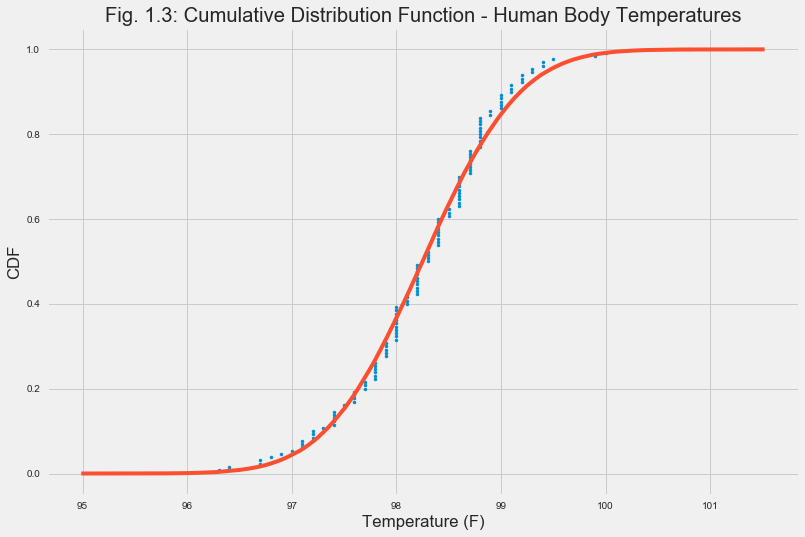

In [5]:
sns.set(rc={"figure.figsize": (12, 8)})
plt.style.use('fivethirtyeight')

# Plot the CDFs
x, y = ecdf(temp)

# draw 100,000 random samples from a normal distribution
nm_temp = np.random.normal(np.mean(temp), np.std(temp), 100000)
nm_x, nm_y = ecdf(nm_temp)

_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(nm_x, nm_y)

_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('CDF')
_ = plt.title('Fig. 1.3: Cumulative Distribution Function - Human Body Temperatures')
margins = 0.02

plt.show();

<div class="alert alert-block alert-success">
<h4>Analysis:</h4>  The histogram (Fig. 1.1) shows that the sample's distribution is unimodal and essentially symmetrical about the mean.  The QQ plot (Fig.1.2) and the CDF (Fig. 1.3), also show that the frequency distribution of the data is very close to normal, although the QQ plot and the CDF both show some variation and a couple of outliers on both tails.
</div>

### Question #2
***
Is the sample size large? Are the observations independent?
 - Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


<div class="alert alert-block alert-success">
<h4>Analysis:</h4>The sample size is not large as a fraction of all human beings, but it is large enough for the Central Limit Theorem to apply.  

<blockquote cite="Boslaugh, Sarah. Statistics in a Nutshell: A Desktop Quick Reference (p. 59). O'Reilly Media. Kindle Edition."><p>The central limit theorem states that the sampling distribution of the sample mean approximates the normal distribution, regardless of the distribution of the population from which the samples are drawn if the sample size is sufficiently large. This fact enables us to make statistical inferences based on the properties of the normal distribution, even if the sample is drawn from a population that is not normally distributed.</p>
</blockquote>

<p>The definition of the central limit theorem reads that the sample size must be 'sufficiently large', but fails to define 'sufficiently large'.  A commonly-accepted rule of thumb is that a sample size of 30 constitutes 'sufficiently large'.  However, if the population from which the samples are drawn is unimodal and symmetric about the mean, a sample size of less than 30 may be sufficient.  Conversely, if the population is multi-modal or skewed, a sample size of more than 30 would be required.</p>

<p> The 130 observations is a tiny fraction of the population of all humans, but, as shown in the analysis of Question #1, the data is unimodal and essentially symmetric about the mean, so, a sample size of 130 is more than sufficient to satisfy the 'sufficiently large' requirement of the central limit theorem.</p>

<p>For the observations to be independent it would mean that knowing the outcome of one sample would provide no information about another sample.  In this case, knowing one person's body temperature gives no information about any other measured body temperature.  Gender or heart rate may have an affect on body temperature.  The effects of gender on mean body temperature are explored below.</p>  
</div>

### Question #3
***
Is the true population mean really 98.6 degrees F?
<ol>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
</ol>

<h4>Hypotheses:</h4>  
$H_0:\  \bar x =$ 98.6°  
$H_a:\  \bar x \neq$ 98.6°

In [7]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


#### 3.1 bootstrap hypothesis test - 100,000 samples

In [8]:
# bootstrap hypothesis test with 100,000 samples
bs_replicates = np.empty(100000)

size = len(bs_replicates)

for i in range(size):
    bs_sample = np.random.choice(temp, len(temp))
    bs_replicates[i] = np.mean(bs_sample)
    
p = np.sum(bs_replicates >= 98.6) / size

print('p-value: ', p)
print('mean: ', np.mean(bs_replicates))

p-value:  0.0
mean:  98.24910042307691


<div class="alert alert-block alert-success">
<h4>Analysis:</h4>  After 100,000 samples, the p-value is 0.0, indicating that the null hypothesis should be rejected.  The mean body temperature of the sample set is 98.25°.
</div>

#### 3.2 frequentist statistical testing
Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?

<div class="alert alert-block alert-success"><h4>Analysis:</h4> When comparing the mean of a single sample to a population with an hypothesised mean, a one-sample $t$-test is appropriate.
</div>

#### 3.3 / 3.4 $t$- or $Z$- statistic?

In this situation, is it appropriate to use the $t$- or $Z$-statistic?

<div class="alert alert-block alert-success">
<h4>Analysis:</h4> 
<p>
$$Z-statistic = Z = \frac{\bar x - \mu}{\frac{\sigma}{\sqrt n}}$$
</p>
<p>
$$t-statistic = t = \frac{\bar x - \mu}{\frac{s}{\sqrt n}}$$
</p>
<p>The formula for the $Z$-statistic requires the population standard deviation, which is unknown.  The $t$-statistic requires only the sample standard deviation, which can be derived.  Without knowing the population standard deviation, the only choice is to use the $t$-statistic.</p>
<p>A two-tailed test is required, since the alternative hypothesis is that there is a statistically-significant difference between the sample mean and the hypothetical population mean of 98.6°, rather than testing whether the actual mean temperature is greater than or less than the hypothesized 98.6°.</p> 
</div>

In [9]:
t_stat = stats.ttest_1samp(temp, 98.6)
print('t-score: {}\np-value: {}'.format(round(t_stat.statistic, 5), round(t_stat.pvalue, 5)))

t-score: -5.45482
p-value: 0.0


### Question #4
***
Draw a small sample of size 10 from the data and repeat both frequentist tests. 
<ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>

#### $t$-test

In [10]:
sample_temp = np.random.choice(a = temp, size=10)

In [11]:
r = stats.ttest_1samp(sample_temp, 98.6)
print('t-score: {:0.4}\np-value: {:0.4}'.format(r.statistic, r.pvalue))

t-score: -1.546
p-value: 0.1565


<div class="alert alert-block alert-success">
<h4>Analysis:</h4><p>Again, since the population standard deviation is unknown, the $t$-test is the only option available.  The p-value is greater than 0.05, so the null hypothesis cannot be rejected on the basis of this test.</p>
</div>

### Question #5
***
At what temperature should we consider someone's temperature to be "abnormal"?
<ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
</ul>

In [12]:
# get the sample mean and standard deviation for use with bootstrap and frequentist approaches below
x_bar = np.mean(temp)
s = np.std(temp)
print('Sample mean: {:0.4}\nSample Standard Deviation: {:0.4}\n'.format(x_bar, s))

Sample mean: 98.25
Sample Standard Deviation: 0.7304



#### Bootstrap

In [13]:
# bootstrap with 10,000 samples
size = 10000
bs_ci_low = np.empty(size)
bs_ci_high = np.empty(size)


for i in range(size):
    bs_sample = np.random.choice(temp, len(temp))
    bs_replicate = stats.norm.interval(0.95, loc=x_bar, scale=s)
    bs_ci_low[i] = bs_replicate[0]
    bs_ci_high[i] = bs_replicate[1]
    
ci_low_b = np.sum(bs_ci_low) / size
ci_high_b = np.sum(bs_ci_high) / size

print('95% confidence interval\n{:0.5} - {:0.5}\n\n'.format(ci_low_b, ci_high_b))
print('margin of error\n{:0.5} - {:0.5}'.format((ci_low_b - x_bar), (ci_high_b - x_bar)))


95% confidence interval
96.818 - 99.681


margin of error
-1.4315 - 1.4315


#### Frequentist Approach

Confidence Interval for One-Sample t-Test
$$CI_{1-\alpha} = \bar x \pm \left(t_{\frac{\alpha}{2}df}\right)\left(\frac{s}{\sqrt n}\right)$$

In [14]:
# frequentist approach - confidence interval for the one-sample t-test

# alpha = 0.05, confidence coefficient = 95%

# confidence interval for one draw
ci_low_f, ci_high_f = stats.norm.interval(0.95, loc=x_bar, scale=s)
print('95% confidence interval (one draw)\n{:0.5} - {:0.5}\n\n'.format(ci_low_f, ci_high_f))


# margin of error 
print('margin of error\n{:0.5} - {:0.5}'.format((ci_low_f - x_bar), (ci_high_f - x_bar))) 

95% confidence interval (one draw)
96.818 - 99.681


margin of error
-1.4315 - 1.4315


<div class="alert alert-block alert-success">
<h4>Analysis:</h4>According to both the Bootstrap and Frequentist approaches, using the mean we calculated (98.249°), and at a 95% confidence interval, a temperature below 96.818° or above 99.681° would be considered abnormal.
</div>

### Question #6
***
Is there a significant difference between males and females in normal temperature?
<ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
</ul>

### Hypotheses
$H_0: \bar x_m\ =\ \bar x_f$  

$H_a: \bar x_m \neq\ \bar x_f$

In [15]:
males = df[df.gender == 'M']
females = df[df.gender == 'F']

print('Of the {} participants, {} are female and {} are male.'.format(len(males + females), len(females), len(males)))

Of the 130 participants, 65 are female and 65 are male.


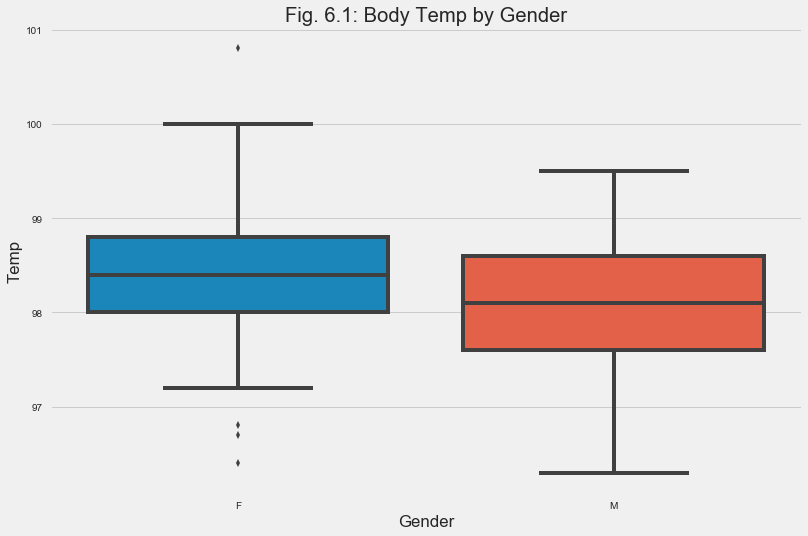

In [16]:
# plot a boxplot for an overview
sns.boxplot(x = 'gender', y = 'temperature', data=df)

sns.set(rc={"figure.figsize": (12, 8)})
plt.style.use('fivethirtyeight')

_ = plt.xlabel('Gender')
_ = plt.ylabel('Temp')
_ = plt.title('Fig. 6.1: Body Temp by Gender')

plt.show();

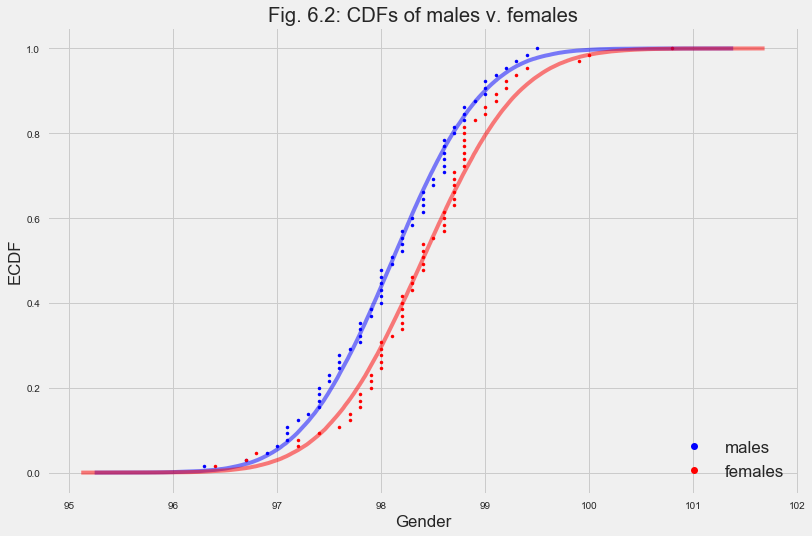

In [17]:
# are both samples normally distributed?
sns.set(rc={"figure.figsize": (12, 8)})
plt.style.use('fivethirtyeight')

# Compute the ECDFs for males and females
x_male, y_male = ecdf(males.temperature)
x_female, y_female = ecdf(females.temperature)

# Generate plot
plt.plot(x_male, y_male, marker = '.', linestyle = 'none', color='b')
plt.plot(x_female, y_female, marker='.', linestyle='none', color='r')

# draw 100,000 random samples from a normal distribution
m_norm_dist = np.random.normal(np.mean(males.temperature), np.std(males.temperature), 100000)
mnd_x, mnd_y = ecdf(m_norm_dist)
_ = plt.plot(mnd_x, mnd_y, color='b', alpha=0.5)

# draw 100,000 random samples from a normal distribution
f_norm_dist = np.random.normal(np.mean(females.temperature), np.std(females.temperature), 100000)
fnd_x, fnd_y = ecdf(f_norm_dist)
_ = plt.plot(fnd_x, fnd_y, color='r', alpha=0.5)

# Make the margins nice
plt.margins = 0.02

# Label the axes
_ = plt.xlabel('Gender')
_ = plt.ylabel('ECDF')
_ = plt.title('Fig. 6.2: CDFs of males v. females')
_ = plt.legend(('males', 'females'), loc='lower right', fontsize='large', markerscale=2)

plt.show();

In [18]:
# common variables
temp_m = males.temperature
temp_f = females.temperature

In [19]:
# Check for identical variances
mv = np.var(temp_m)
fv = np.var(temp_f)

print('Male variance: {}\nFemale variance: {}'.format(mv, fv))

Male variance: 0.4807479289940825
Female variance: 0.5442698224852062


In [20]:
# confirm that variances are not equal with bootstrap - null hypothesis is that they are equal

size = 10000

bs_replicates_m = np.empty(size)

for i in range(size):
    bs_sample_m = np.random.choice(temp_m, len(temp_m))
    bs_replicates_m[i] = np.var(bs_sample_m)
    
bs_var_m = np.sum(bs_replicates_m)/size

bs_replicates_f = np.empty(size)

for i in range(size):
    bs_sample_f = np.random.choice(temp_f, len(temp_f))
    bs_replicates_f[i] = np.var(bs_sample_f)

bs_var_f = np.sum(bs_replicates_f)/size

bs_var_m
bs_var_f
print('Bootstrap verification:\nMale variance: {}\nFemale variance: {}'.format(bs_var_m, bs_var_f))

0.4739684009467454

0.5372722897041412

Bootstrap verification:
Male variance: 0.4739684009467454
Female variance: 0.5372722897041412


In [21]:
# Variances are not identical, so set `equal_var` to false to perform Welch's t-test
r = stats.ttest_ind(temp_m, temp_f, equal_var=False)
print('t-statistic: {:0.4}\np-value: {:0.4}'.format(r.statistic, r.pvalue))

t-statistic: -2.285
p-value: 0.02394


In [22]:
# males
print('MALES')
xbar_m = np.mean(temp_m)
s_m = np.std(temp_m)
print('sample mean: {}\nsample standard deviation: {}\n'.format(round(xbar_m, 3), round(s_m, 3)))

# confidence interval for one draw
ci_low_m, ci_high_m = stats.norm.interval(0.95, loc=xbar_m, scale=s_m)
print('95% confidence interval (one draw): {} - {}'.format(round(ci_low_m, 3), round(ci_high_m, 3)))

# females
print('\n\nFEMALES')
xbar_f = np.mean(temp_f)
s_f = np.std(temp_f)
print('sample mean: {}\nsample standard deviation: {}\n'.format(round(xbar_f, 3), round(s_f, 3)))

# confidence interval for one draw
ci_low_f, ci_high_f = stats.norm.interval(0.95, loc=xbar_f, scale=s_f)
print('95% confidence interval (one draw): {} - {}'.format(round(ci_low_f, 3), round(ci_high_f, 3)))

MALES
sample mean: 98.105
sample standard deviation: 0.693

95% confidence interval (one draw): 96.746 - 99.464


FEMALES
sample mean: 98.394
sample standard deviation: 0.738

95% confidence interval (one draw): 96.948 - 99.84


In [23]:
# bootstrap - two-sided Welch's t-test  
size = 10000
bs_replicates_m = np.empty(size)

for i in range(size):
    bs_sample_m = np.random.choice(temp_m, len(temp_m))
    bs_replicates_m[i] = np.mean(bs_sample_m)
    
bs_mean_m = np.sum(bs_replicates_m)/size

bs_replicates_f = np.empty(size)

for i in range(size):
    bs_sample_f = np.random.choice(temp_f, len(temp_f))
    bs_replicates_f[i] = np.mean(bs_sample_f)

bs_mean_f = np.sum(bs_replicates_f)/size


result = stats.ttest_ind(bs_replicates_f, bs_replicates_m, equal_var=False)

print('Welch\'s t-test:\nt-statistic: {:0.5}\np-value: {:0.5}'.format(result[0], result[1]))

Welch's t-test:
t-statistic: 227.09
p-value: 0.0


<div class="alert alert-block alert-success">
<h4>Analysis:</h4>  <p>The mean human body temperature has been proven to be 98.25°, rather than 98.6°.  The sample consists of 130 samples; 65 male and 65 female.</p>

<p>A boxplot (Fig. 6.1) shows that the females' mean body temperature is slightly higher than the males'.</p>

<p>CDFs (Fig. 6.2) show that both sample sets roughly follow the standard normal distribution, with the females' temperatures running a little warmer and with slightly more variation.</p>  

<p>The distributions for both samples approximate the standard normal distribution and both sample sizes are sufficiently large, so the Central Limit Theorem applies and inferences can be made based on the properties of the normal distribution.</p>

$$H_0: \bar x_m = \bar x_f$$
$$H_A: \bar x_m \neq \bar x_f$$  


<p>The null hypothesis is that the mean male body temperature is equal to the mean female body temperature.  An unequal variance $t$-test will be used to test the means of two continuous distributions with unequal variances.  Because the null hypothesis is that the means are equal, a two-tailed test is required.</p>

<p>The p-values and $t$-statistics for both the bootstrap and frequentist hypothesis tests require that the null hypothesis be rejected and support the alternate hypothesis that mean male and female body temperatures are different.  A table summarizing the differences between male and female mean body temperatures is provided below:</p>

<table>
<thead>
<tr>
<th></th>
<th>Male</th>
<th>Female</th>
</tr>
</thead>
<tbody>
<tr>
<td>$\bar x$</td>
<td>98.105</td>
<td>98.394</td>
</tr>
<tr>
<td>$s$</td>
<td>0.693</td>
<td>0.738</td>
</tr>
<tr>
<td>Margin of Error</td>
<td>1.359</td>
<td>1.446</td>
</tr>
<tr>
<td>95% Conf. Int.</td>
<td>(96.746, 99.464)</td>
<td>(96.948, 99.84)</td>
</tr>
</tbody></table>

</div>